In [2]:
from google.colab import files
myfile = files.upload()

Saving 20182132-data1.csv to 20182132-data1.csv


# __Term Project Code__
+ Original Data/Table
+ Function

In [3]:
from datascience import *
import numpy as np
import pandas as pd
import datetime

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
np.set_printoptions(threshold=50)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  import sys


In [5]:
data=Table.read_table('20182132-data1.csv', encoding='cp949')
data

날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1973-01-01,전국,2.3,-1.3,6.2
1973-01-02,전국,-3.1,-7.7,2.6
1973-01-03,전국,-4.6,-9.5,0.3
1973-01-04,전국,-1.1,-5.8,4.2
1973-01-05,전국,0.1,-3.7,5.3
1973-01-06,전국,0.8,-4,5.4
1973-01-07,전국,2.2,0.9,4
1973-01-08,전국,2.1,-0.3,5.1
1973-01-09,전국,2.3,-1,6.3
1973-01-10,전국,0.9,-3.4,4


In [6]:
#필요없는 칼럼만 제거해준다.
data_test = data.drop([1, 3, 4])
data_test

날짜,평균기온(℃)
1973-01-01,2.3
1973-01-02,-3.1
1973-01-03,-4.6
1973-01-04,-1.1
1973-01-05,0.1
1973-01-06,0.8
1973-01-07,2.2
1973-01-08,2.1
1973-01-09,2.3
1973-01-10,0.9


> ### Definition
---
+ 계절의 기상학적 정의
  + 봄 : 일평균 기온이 5℃ 이상 올라간 후 다시 떨어지지 않는 첫 날
  + 여름 : 일평균 기온이 20℃ 이상 올라간 후 다시 떨어지지 않는 첫 날
  + 가을 : 일평균 기온이 20℃ 미만으로 내려간 후 다시 올라가지 않는 첫 날
  + 겨울 : 일평균 기온이 5℃ 미만으로 내려간 후 다시 올라가지 않는 첫 날
+ 각 계절의 일평균 기온 조건을 만족하는 기간을 9일로 정의하고 각 계절의 첫 날을 구해보자. 

In [7]:
#봄 시작날짜
def spring_date(array, size) :
  """Returns an datetime's index of the beginning period of spring :
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    """

  test_array = array > 5.0

  cnt=0
  while(cnt<9) :
    for i in np.arange(size) :
      if(test_array[i] == True) :
        cnt+=1
        if(cnt==9) :
          date_index = i
          break
      else :
        cnt=0

  return date_index-9

In [8]:
#여름 시작날짜
def summer_date(array, size) :
  """Returns an datetime's index of the beginning period of summer :
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    """

  test_array = array >= 20.0

  cnt=0
  while(cnt<9) :
    for i in np.arange(size) :
      if(test_array[i] == True) :
        cnt+=1
        if(cnt==9) :
          date_index = i
          break
      else :
        cnt=0

  return date_index-9

In [9]:
#가을 시작날짜
def autumn_date(array, size, summer_start_ind) :
  """Returns an datetime's index of the beginning period of autumn:
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    summer_start_ind : an datetime's index of last day of the beginning period of summer
    """

  test_array = array < 20.0
  
  cnt=0
  i = summer_start_ind
  while(cnt<9) :
    for i in np.arange(i, size) :
      if(test_array[i] == True) :
        cnt+=1
        if(cnt==9) :
          date_index = i
          break
      else :
        cnt=0

  return date_index-9

In [10]:
#겨울 시작날짜
def winter_date(array, size, summer_start_ind) :
  """Returns an datetime's index of the beginning period of autumn:
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    autumn_start_ind : an datetime's index of last day of the beginning period of autumn
    """

  test_array = array < 5.0

  cnt=0
  i = summer_start_ind
  while(cnt<9) :
    for i in np.arange(i, size) :
      if(test_array[i] == True) :
        cnt+=1
        if(cnt==9) :
          date_index = i
          break
      else :
        cnt=0

  return date_index-9

+ (다음 계절의 시작 날짜 - 해당 계절의 시작 날짜)를 하여 각 계절의 길이를 구한다.

In [11]:
#봄 길이
def spring(array, size) :
  """Returns an interval of spring :
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    """

  start_spring_date = spring_date(array, size)
  start_summer_date = summer_date(array, size)

  return start_summer_date - start_spring_date

In [12]:
#여름 길이
def summer(array, size) :
  """Returns an interval of summer :
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    """

  start_summer_date = summer_date(array, size)
  start_autumn_date = autumn_date(array, size, start_summer_date)

  return start_autumn_date - start_summer_date

In [13]:
#가을 길이
def autumn(array, size) :
  """Returns an interval of autumn :
    array: array containing average daily temperature
    size : length of array containing average daily temperature
    """

  start_autumn_date = autumn_date(array, size, summer_date(array, size))
  start_winter_date = winter_date(array, size, summer_date(array, size))

  return start_winter_date - start_autumn_date

In [14]:
#년도별로 데이터를 나눠야 하기에 이런 방식에 적합한 pandas를 사용
dataF=pd.DataFrame({'Date':pd.to_datetime(data['날짜']),
              'Temp':data['평균기온(℃)']}).set_index(['Date'])
dataF

,Temp
Date,
1973-01-01,2.3
1973-01-02,-3.1
1973-01-03,-4.6
1973-01-04,-1.1
1973-01-05,0.1
...,...
2021-12-27,-4.6
2021-12-28,0.0
2021-12-29,2.5


In [15]:
#봄/여름/가을 기간
spring_interval = make_array()
summer_interval = make_array()
autumn_interval = make_array()

#각 년도 별로 데이터를 나누어 저장을 하였습니다.
for i in range(1973,2022):
  Year_Temp = Table().with_columns(
      'Date', np.array(dataF.loc[str(i)].reset_index().Date,dtype='datetime64[D]'),
      'Daily_Temperature',dataF.loc[str(i)].Temp
  )

  temp_year = Year_Temp.column(1)
  length = temp_year.size
#각 년도 별로 봄/가을/여름의 길이를 구하고 array에 추가 시켜줬습니다
  spring_interval = np.append(spring_interval, spring(temp_year, length))
  autumn_interval = np.append(autumn_interval, autumn(temp_year, length))
  summer_interval = np.append(summer_interval, summer(temp_year, length))

In [16]:
#1973~2021 봄/가을 Data Table
SA_period = Table().with_columns(
    'Year',np.arange(1973,2022),
    'Spring_Period',spring_interval,
    'Autumn_Period',autumn_interval
)

SA_period

Year,Spring_Period,Autumn_Period
1973,78,69
1974,90,79
1975,77,65
1976,86,62
1977,83,73
1978,84,75
1979,86,61
1980,76,86
1981,88,78
1982,69,75


# __Plot Graph__

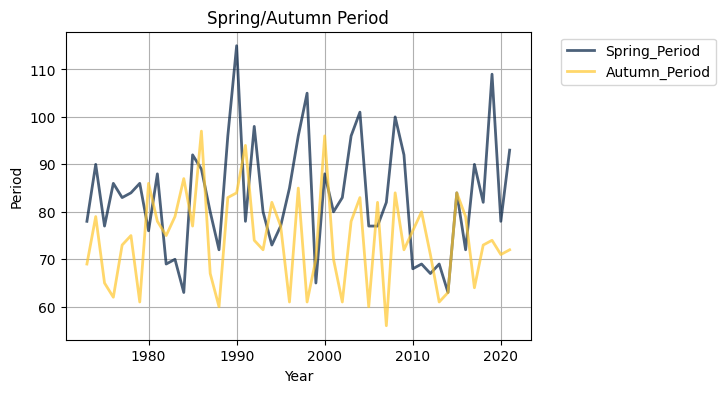

In [17]:
#봄/가을 Overlaid Plot Graph
SA_period.plot('Year', linewidth = 2.0)
plt.grid()
plt.ylabel('Period')
plt.title('Spring/Autumn Period');

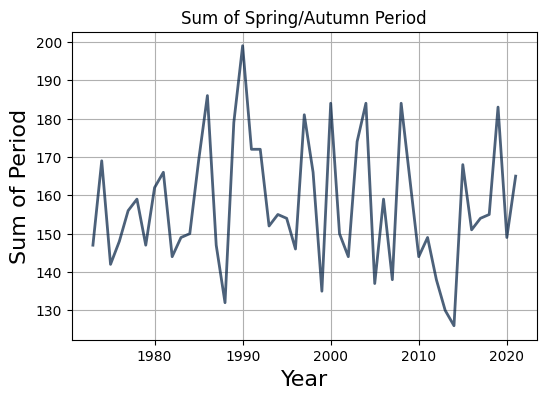

In [18]:
#봄+가을 Plot Graph
Sum_Data = Table().with_columns(
    'Year', np.arange(1973,2022),
    'Sum of S/A', SA_period.column(1) + SA_period.column(2)
)
Sum_Data.plot('Year', linewidth = 2.0)
plt.grid()
plt.ylabel('Sum of Period')
plt.title('Sum of Spring/Autumn Period');

# __The Regression Line__

In [19]:
#Z
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

In [20]:
#상관계수
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

#선형회귀 직선의 기울기
def slope(t, label_x, label_y): 
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

#선형회귀 직선의 절편
def intercept(t, label_x, label_y): 
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [21]:
Sum_Data

Year,Sum of S/A
1973,147
1974,169
1975,142
1976,148
1977,156
1978,159
1979,147
1980,162
1981,166
1982,144


In [22]:
#상관계수, 기울기, 절편
SA_r = correlation(Sum_Data, 'Year', 'Sum of S/A')
SA_slope = slope(Sum_Data, 'Year', 'Sum of S/A')
SA_intercept = intercept(Sum_Data, 'Year', 'Sum of S/A')

print("Correlation = ", SA_r)
print("Slope = ", SA_slope)

Correlation =  -0.05093180318720906
Slope =  -0.059795918367346934


In [23]:
#Prediction
SA_interval_with_predictions = Sum_Data.with_column(
    'interval Prediction', SA_slope*Sum_Data.column('Year') + SA_intercept
)
SA_interval_with_predictions

Year,Sum of S/A,interval Prediction
1973,147,158.864
1974,169,158.804
1975,142,158.744
1976,148,158.684
1977,156,158.624
1978,159,158.565
1979,147,158.505
1980,162,158.445
1981,166,158.385
1982,144,158.326


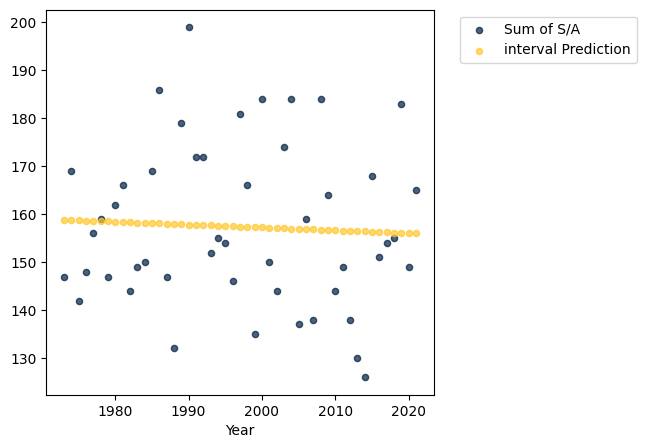

In [24]:
#Visualization of Regression Line
SA_interval_with_predictions.scatter('Year')

# __Shuffling__
+ recent_year : Data for 2017~2021
+ old_year : Data for 1973-2016

In [25]:
#New Table
SA_Data = SA_period.with_column(
    'Sum of S/A', SA_period.column(1)+SA_period.column(2)
)
SA_Data

Year,Spring_Period,Autumn_Period,Sum of S/A
1973,78,69,147
1974,90,79,169
1975,77,65,142
1976,86,62,148
1977,83,73,156
1978,84,75,159
1979,86,61,147
1980,76,86,162
1981,88,78,166
1982,69,75,144


In [26]:
#최근 5년을 recent_year으로 만들고 나머지를 old_year로 나누기 위한 array를 만들어 줍니다.
recent_array = make_array()
for i in np.arange(5) :
  recent_array = np.append(recent_array, "recent_year")

old_array = make_array()
for i in np.arange(44) :
  old_array = np.append(old_array, 'old_year')

Year_array = np.append(recent_array, old_array)
Year_array

array(['recent_year', 'recent_year', 'recent_year', 'recent_year',
       'recent_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year',
       'old_year', 'old_year', 'old_year', 'old_year', 'old_year'],
      dtype='<U32')

In [27]:
Sum_table = Table().with_columns(
    'Years', Year_array,
    'Sum_data', SA_Data.sort('Year', descending = True).column(3)
)
Sum_table

Years,Sum_data
recent_year,165
recent_year,149
recent_year,183
recent_year,155
recent_year,154
old_year,151
old_year,168
old_year,126
old_year,130
old_year,138


In [28]:
#Average of Old/Recent year
Sum_table.group('Years', np.mean)

Years,Sum_data mean
old_year,157
recent_year,161.2


In [29]:
#observed data = old_year - recent_year
observed_difference = Sum_table.group('Years', np.mean).column(1).item(0) - Sum_table.group('Years', np.mean).column(1).item(1)
observed_difference

-4.199999999999989

In [30]:
#무작위 Shuffling : old_year - recent_year
def permuted_sample_average_difference(table, label, group_label, repetitions):
    tbl = table.select(group_label, label)
    
    differences = make_array()
    for i in np.arange(repetitions):
        shuffled = tbl.sample(with_replacement = False).column(1)   
        original_and_shuffled = tbl.with_column('Shuffled Data', shuffled)

        shuffled_means = original_and_shuffled.group(group_label, np.average).column(2)     
        simulated_difference = shuffled_means.item(0) - shuffled_means.item(1)
    
        differences = np.append(differences, simulated_difference)
    
    return differences   

In [31]:
differences = permuted_sample_average_difference(Sum_table, 'Sum_data', 'Years', 10000)

Text(0.5, 1.0, 'Old S/A Period - Recent S/A Period')

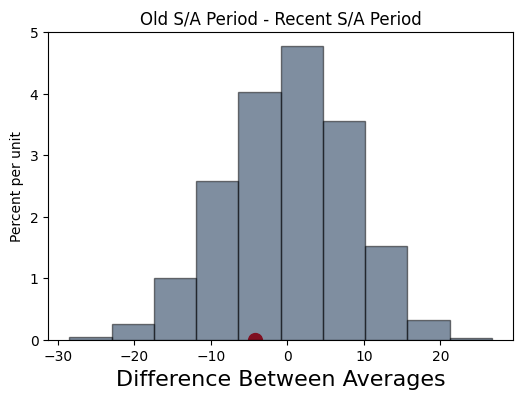

In [32]:
#Shuffled Data Histogram & Observed Data
Table().with_column('Difference Between Averages', differences).hist(edgecolor='black',alpha=0.5)
plt.scatter(observed_difference, 0, color='red', s=100)
plt.title('Old S/A Period - Recent S/A Period')

In [33]:
#P-Value
P_Value = np.count_nonzero(differences >= observed_difference) / 10000
P_Value

0.7112

# __BootStrap__

In [34]:
#부트스트랩
def bootstrap_difference(table, label, group_label, repetitions) :
  tbl = table.select(group_label, label)
  differences_data = make_array()

  for i in np.arange(repetitions) :
    bootstrap_sample = tbl.sample().group(group_label, np.average)
    bootstarp_average = bootstrap_sample.column(1)
    while np.count_nonzero(bootstarp_average)!=2:
      bootstrap_sample = tbl.sample().group(group_label, np.average)
      bootstarp_average = bootstrap_sample.column(1)
    bootstarp_difference = bootstarp_average[0] - bootstarp_average[1]

    differences_data = np.append(differences_data, bootstarp_difference)

  return differences_data

differences_data = bootstrap_difference(Sum_table, 'Sum_data', 'Years', 5000)

In [35]:
#신뢰구간(95%)
left = percentile(2.5, differences_data)
right = percentile(97.5, differences_data)
make_array(left, np.round(right,5))

array([-18.06111111,   6.92029   ])

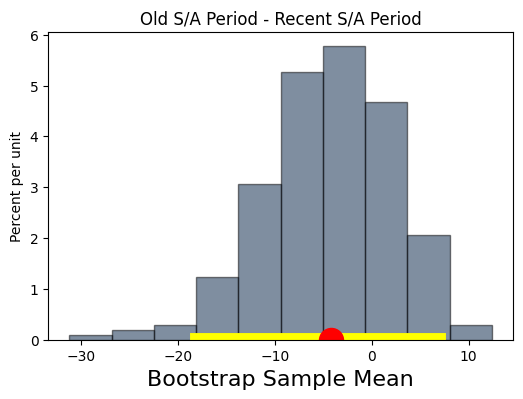

In [36]:
#신뢰구간 95%이내에 있다. -> 관측값은 신뢰 할 만한 데이터이다.
resampled_dif = Table().with_column('Bootstrap Sample Mean', differences_data)
resampled_dif.hist(edgecolor='black',alpha=0.5)
plt.title('Old S/A Period - Recent S/A Period')
plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=10, zorder=1)
plt.scatter(observed_difference, 0, color='red', s=300, zorder=2);

# __Why?__
+ 여름의 길이가 길어져 봄이 빨라지고 가을이 늦춰져서 봄/가을이 짧아졌다고 느끼게된다.

In [37]:
#봄/가을 시작날짜 index
spring_start_array = make_array()
autumn_start_array = make_array()
summer_start_array = make_array()

for i in range(1973,2022):
  Year_Temp = Table().with_columns(
      'Date', np.array(dataF.loc[str(i)].reset_index().Date,dtype='datetime64[D]'),
      'Daily_Temperature',dataF.loc[str(i)].Temp
  )
  
  temp_year = Year_Temp.column(1)
  length = temp_year.size

  spring_start_array = np.append(spring_start_array, spring_date(temp_year, length))
  summer_start_array = np.append(summer_start_array, summer_date(temp_year, length))
  autumn_start_array = np.append(autumn_start_array, autumn_date(temp_year, length, summer_date(temp_year, length)))

In [38]:
Original_Start_Date = Table().with_columns(
    'Years', np.arange(1973, 2022),
    'Spring_Start_Date', spring_start_array,
    'Summer_Start_Date', summer_start_array,
    'Autumn_Start_Date', autumn_start_array
)
Original_Start_Date

Years,Spring_Start_Date,Summer_Start_Date,Autumn_Start_Date
1973,84,162,264
1974,82,172,256
1975,90,167,273
1976,83,169,255
1977,69,152,277
1978,80,164,275
1979,76,162,264
1980,84,160,259
1981,74,162,251
1982,84,153,262


In [39]:
#각 년대별로 나누기 위해서 만든 array
Year_classification = make_array()

for i in np.arange(7) :
  Year_classification = np.append(Year_classification, "1970s")

for i in np.arange(10) :
  Year_classification = np.append(Year_classification, "1980s")

for i in np.arange(10) :
  Year_classification = np.append(Year_classification, "1990s")
  
for i in np.arange(10) :
  Year_classification = np.append(Year_classification, "2000s")

for i in np.arange(10) :
  Year_classification = np.append(Year_classification, "2010s")

for i in np.arange(2) :
  Year_classification = np.append(Year_classification, "2020~2021")

Year_classification

array(['1970s', '1970s', '1970s', '1970s', '1970s', '1970s', '1970s',
       '1980s', '1980s', '1980s', '1980s', '1980s', '1980s', '1980s',
       '1980s', '1980s', '1980s', '1990s', '1990s', '1990s', '1990s',
       '1990s', '1990s', '1990s', '1990s', '1990s', '1990s', '2000s',
       '2000s', '2000s', '2000s', '2000s', '2000s', '2000s', '2000s',
       '2000s', '2000s', '2010s', '2010s', '2010s', '2010s', '2010s',
       '2010s', '2010s', '2010s', '2010s', '2010s', '2020~2021',
       '2020~2021'], dtype='<U32')

In [40]:
#년대 별로 끊은 Summer Period
Summer_Time_Table = Table().with_columns(
    'Years', Year_classification,
    'Summer Period', summer_interval
)
Summer_Time_Table

Years,Summer Period
1970s,102
1970s,84
1970s,106
1970s,86
1970s,125
1970s,111
1970s,102
1980s,99
1980s,89
1980s,109


In [41]:
#여름의 길이
Mean_Summer = Summer_Time_Table.group('Years', np.mean)
Mean_Summer

Years,Summer Period mean
1970s,102.286
1980s,100.7
1990s,101.5
2000s,104.4
2010s,116.4
2020~2021,117.5


Text(0.5, 1.0, 'Changes in Summer Period')

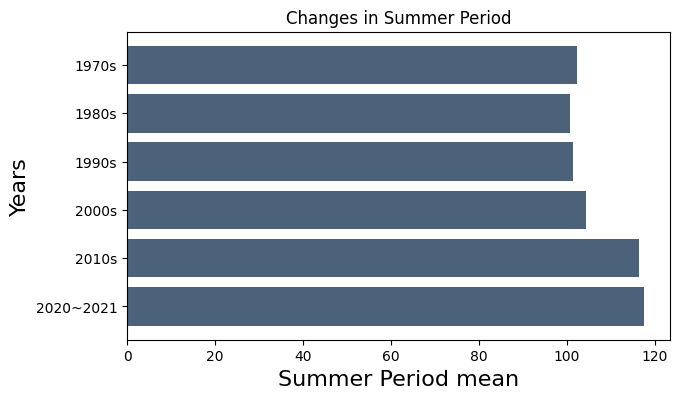

In [42]:
#1970년대와 2020년대의 여름은 15일가량 차이가난다.
#2020년대 들어서 1970년대에 비해 여름이 15일이 늘었다.
Mean_Summer.barh('Years', width = 7.0)
plt.title("Changes in Summer Period")

In [43]:
#1970년대와 2020년대를 비교하기 위해 만든 array
Year_classification_2 = make_array()

for i in np.arange(7) :
  Year_classification_2 = np.append(Year_classification_2, "1970s")

for i in np.arange(2) :
  Year_classification_2 = np.append(Year_classification_2, "2020s")

Year_classification_2

array(['1970s', '1970s', '1970s', '1970s', '1970s', '1970s', '1970s',
       '2020s', '2020s'], dtype='<U32')

In [44]:
spring_start_array_2 = np.append(spring_start_array.take(np.arange(7)), spring_start_array.take(make_array(-2,-1)))
autumn_start_array_2 = np.append(autumn_start_array.take(np.arange(7)), autumn_start_array.take(make_array(-2,-1)))

In [45]:
#1970, 2020년대의 봄/가을 시작 날짜index 데이터
Start_Date = Table().with_columns(
    'Years', Year_classification_2,
    'Spring Start Date', spring_start_array_2,
    'Autumn Start Date', autumn_start_array_2
)
Start_Date

Years,Spring Start Date,Autumn Start Date
1970s,84,264
1970s,82,256
1970s,90,273
1970s,83,255
1970s,69,277
1970s,80,275
1970s,76,264
2020s,75,260
2020s,61,282


In [46]:
#1년 365일 기준 1970년대와 2020년대의 봄/가을 시작날짜(index)
Start_Date.group('Years', np.average).relabeled(1, 'Spring_start').relabeled(2, 'Autumn_start')

Years,Spring_start,Autumn_start
1970s,80.5714,266.286
2020s,68,271


In [47]:
#봄/가을 시작일의 변화(1970s -> 2020s)
#1970년대에 비해 2020년의 봄 시작일은 12일가량 빨라지고, 가을은 5일가량 늦춰졌다.
spring_diff = np.diff(Start_Date.group('Years', np.average).column(1))
autumn_diff = np.diff(Start_Date.group('Years', np.average).column(2))
dif_ary = "Difference"

Date_diff = Table().with_column(
    'Difference', dif_ary,
    'Spring', spring_diff,
    'Autumn', autumn_diff
)

Date_diff

Difference,Spring,Autumn
Difference,-12.5714,4.71429
